# FINGER 3

Creamos una lista que contiene elemetos de uno a veinte millones.

In [1]:
integerListRDD = sc.parallelize(xrange(2,20000000),2000)

A continuacion se implementa la funcion Collatz  

In [2]:
def collatz(x) :
    list = [x]
    while x > 1 :
        if x%2 == 0 :
            x = x / 2
        else:
            x = x * 3 +1
        list.append(x)
    return list

Aplicamos collatz a todos los elementos de la lista

In [3]:
collatzListRDD = integerListRDD.map((lambda a: collatz(a)))

Manipulamos la lista a la cual aplicamos collatz para visualizar el primer elemento que comienza la secuenta, y la longitud de la secuencia que este genera.

In [4]:
collatzGraphicsData = collatzListRDD.map(lambda row: (row[0],len(row) ) )

In [5]:
collatzGraphicsData.take(5)

[(2, 2), (3, 8), (4, 3), (5, 6), (6, 9)]

Graficamos la informacion obtenida

Buscamos la mayor secuencia de collatz

In [6]:
collatzMaxLen = collatzListRDD.takeOrdered(1,lambda list: -len(list))

In [7]:
print "Longitud de maxima secuencia: ", len(collatzMaxLen[0])

Longitud de maxima secuencia:  705


In [8]:
print "Valor inicial que genera maxima secuencia: ", collatzMaxLen[0][0]

Va+lor inicial que genera maxima secuencia:  15733191


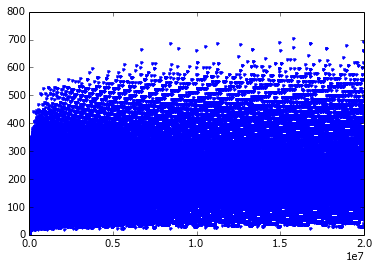

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

x = collatzGraphicsData.map(lambda x : x[0])
y = collatzGraphicsData.map(lambda y : y[1])
plt.axis([2, 20000000, 0, 800])
plt.plot(x.collect(), y.collect(), '.')
plt.show()